In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("./extracted_files/data.csv")
data.shape

(438991, 32)

In [4]:
data.loan_status.value_counts().unique

<bound method Series.unique of loan_status
Current        251552
Fully Paid     132055
Charged Off     40902
Late            14482
Name: count, dtype: int64>

In [5]:
current_loans = data[data["loan_status"] == "Current"]

current_loans.to_csv('extracted_files/current_loans.csv', index=False)
print(current_loans.shape[0])

251552


In [6]:
df = data[data["loan_status"] != "Current"]
df.shape

(187439, 32)

In [7]:
df["loan_status"].value_counts()



loan_status
Fully Paid     132055
Charged Off     40902
Late            14482
Name: count, dtype: int64

In [8]:
df.columns

Index(['id', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_high', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'annual_inc_joint',
       'dti_joint', 'inq_last_12m', 'acc_open_past_24mths', 'bc_util',
       'mort_acc', 'num_accts_ever_120_pd', 'percent_bc_gt_75',
       'total_bal_ex_mort'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187439 entries, 0 to 438971
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      187439 non-null  int64  
 1   funded_amnt             187439 non-null  int64  
 2   term                    187439 non-null  object 
 3   int_rate                187439 non-null  object 
 4   installment             187439 non-null  float64
 5   emp_title               174864 non-null  object 
 6   emp_length              174995 non-null  object 
 7   home_ownership          187439 non-null  object 
 8   annual_inc              187439 non-null  float64
 9   loan_status             187439 non-null  object 
 10  purpose                 187439 non-null  object 
 11  zip_code                187439 non-null  object 
 12  addr_state              187439 non-null  object 
 13  dti                     187348 non-null  float64
 14  delinq_2yrs             1

In [10]:
#here are defining funciton for good loan and bad loan
# 1 for good loan and 0 for bad loan

df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=="Fully Paid" else 0)
df["loan_status"]


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_11180\2824203601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=="Fully Paid" else 0)


0         1
5         1
7         1
8         1
10        1
         ..
438956    1
438957    0
438963    1
438966    0
438971    1
Name: loan_status, Length: 187439, dtype: int64

In [11]:
#first we will decide which columns are required and which columns are not
#this can be used for column mapping thru evedently for future data drifts
target = "loan_status"
prediction = "prediction"
numerical_features = ["funded_amnt", "int_rate", "annual_inc", "dti", "fico_range_high", "revol_bal", "revol_util", "bc_util", "total_bal_ex_mort", "inq_last_12m", "num_accts_ever_120_pd"]
categorical_features = ["term", "home_ownership", "delinq_2yrs", "mort_acc"]

In [12]:

df = pd.concat([df[numerical_features + categorical_features], df[["loan_status"]]], axis=1, ignore_index=False)
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 187439 entries, 0 to 438971
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            187439 non-null  int64  
 1   int_rate               187439 non-null  object 
 2   annual_inc             187439 non-null  float64
 3   dti                    187348 non-null  float64
 4   fico_range_high        187439 non-null  int64  
 5   revol_bal              187439 non-null  int64  
 6   revol_util             187308 non-null  object 
 7   bc_util                185049 non-null  float64
 8   total_bal_ex_mort      187439 non-null  int64  
 9   inq_last_12m           187428 non-null  float64
 10  num_accts_ever_120_pd  187439 non-null  int64  
 11  term                   187439 non-null  object 
 12  home_ownership         187439 non-null  object 
 13  delinq_2yrs            187439 non-null  int64  
 14  mort_acc               187439 non-null  i

In [13]:
#funded_amnt we don't have to do anything here but we will use standard scaler for this
df["funded_amnt"].min()
#funded_amnt we don't have to do anything here but we will use standard scaler for this
df["funded_amnt"].max()

pd.isna(df["funded_amnt"]).sum()

np.int64(0)

In [14]:
#int_rate we have to remove % sign so that we can 
df["int_rate"].head()
df["int_rate"] = df["int_rate"].apply(lambda x: x.replace('%', ''))
df["int_rate"].head()
df['int_rate'] = df['int_rate'].astype('float64')

df["int_rate"].isna().sum()

np.int64(0)

In [15]:
#annual_inc it has zeros and some outliers

df= df[df['annual_inc'] != 0]
df.shape

##now we are dealing with outliers

# Define bounds for outliers
upper_bound = df['annual_inc'].quantile(0.99)

# Identify outliers
outliers = df[(df['annual_inc'] > upper_bound)]
df = df[(df['annual_inc'] < upper_bound)]
print(f"upper bound: ", upper_bound)
print(outliers.value_counts())
print(df.shape)
print(f'value counts for customer above $250000',df[(df['annual_inc'] > upper_bound)].value_counts().sum())
##since value counts are not that bigger and may impact on our data because of high income, we will remove those outliers

upper bound:  270000.0
funded_amnt  int_rate  annual_inc  dti    fico_range_high  revol_bal  revol_util  bc_util  total_bal_ex_mort  inq_last_12m  num_accts_ever_120_pd  term       home_ownership  delinq_2yrs  mort_acc  loan_status
40000        30.49     350000.0    12.13  689              49206      32.50%      33.6     213321             4.0           2                      60 months  MORTGAGE        1            7         1              1
1000         11.49     342496.0    13.15  694              28933      84.80%      84.8     96574              1.0           0                      36 months  RENT            0            3         1              1
40000        12.79     450000.0    14.04  754              22463      25%         2.0      165267             2.0           0                      36 months  MORTGAGE        0            2         1              1
             13.49     275000.0    7.19   699              10165      64.70%      64.7     61977              2.0           4 

<Axes: xlabel='annual_inc', ylabel='Count'>

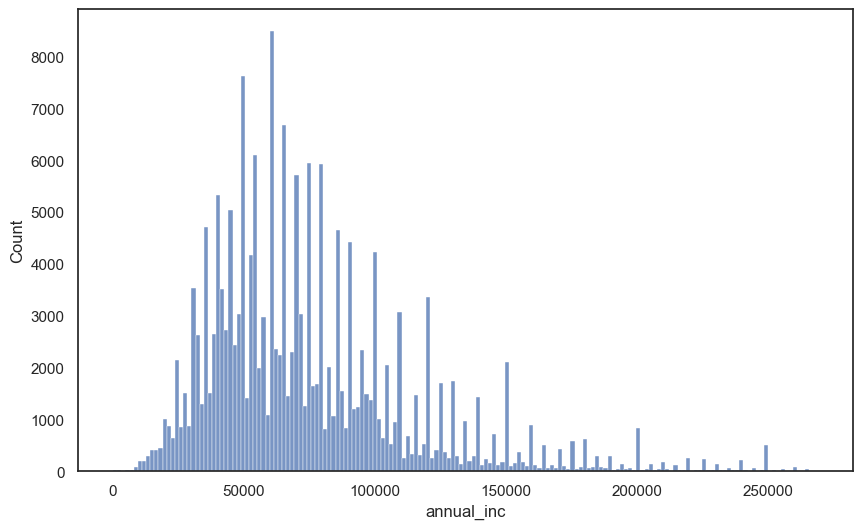

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='annual_inc')


-1.0
999.0
41.36


<Axes: xlabel='dti', ylabel='Count'>

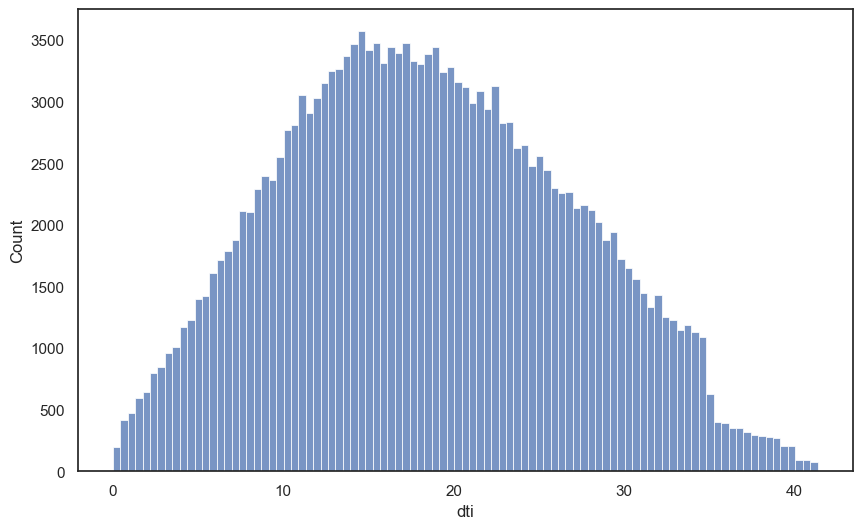

In [17]:
##dti


print(df['dti'].min())
print(df['dti'].max())

df= df[df['dti'] > 0]
df.shape

# Define bounds for outliers
upper_bound = df['dti'].quantile(0.99)
df = df[(df['dti'] < upper_bound)]


print(upper_bound)
plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='dti')


<Axes: xlabel='fico_range_high', ylabel='Count'>

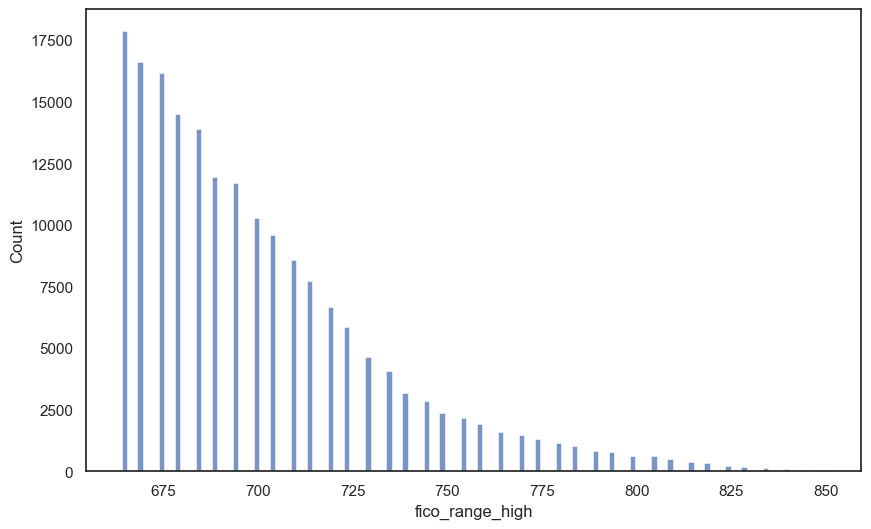

In [18]:
#fico_range_high
df['fico_range_high'].min()
df['fico_range_high'].max()

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='fico_range_high')

##part 2 apply box cox transformation for this data


0
779021
38099.0
(183502, 16)


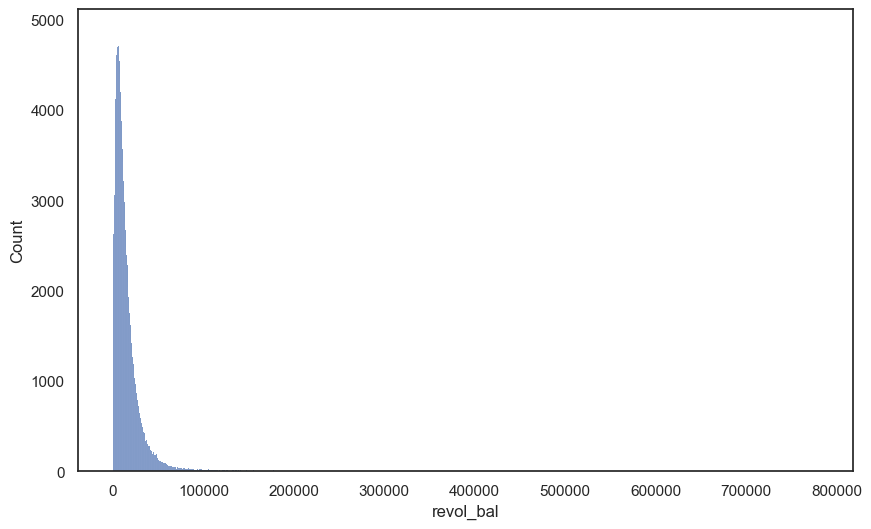

In [19]:
#revol_bal


print(df['revol_bal'].min())
print(df['revol_bal'].max())

Q1 = df['revol_bal'].quantile(0.25)
Q3 = df['revol_bal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Define bounds for outliers
# upper_bound = df['revol_bal'].quantile(0.85)
df = df[(df['dti'] < upper_bound)]

print(upper_bound)

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='revol_bal')
print(df.shape)

In [20]:
#revol_util

# df['revol_util'].head()

df['revol_util'] = df['revol_util'].apply(lambda x: 0 if x == 'nan' else x)
df['revol_util'] = df['revol_util'].apply(lambda x: str(x).replace('%', ''))
df['revol_util'] = df['revol_util'].astype('float64')
df.info()

print(df['revol_util'].min())
print(df['revol_util'].max())

# plt.figure(figsize=(10, 6))
# sns.set(style = "white")
# sns.histplot(data=df, x='revol_util')
# print(df['revol_util'])

df['revol_util'].unique()


<class 'pandas.core.frame.DataFrame'>
Index: 183502 entries, 0 to 438971
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            183502 non-null  int64  
 1   int_rate               183502 non-null  float64
 2   annual_inc             183502 non-null  float64
 3   dti                    183502 non-null  float64
 4   fico_range_high        183502 non-null  int64  
 5   revol_bal              183502 non-null  int64  
 6   revol_util             183386 non-null  float64
 7   bc_util                181184 non-null  float64
 8   total_bal_ex_mort      183502 non-null  int64  
 9   inq_last_12m           183491 non-null  float64
 10  num_accts_ever_120_pd  183502 non-null  int64  
 11  term                   183502 non-null  object 
 12  home_ownership         183502 non-null  object 
 13  delinq_2yrs            183502 non-null  int64  
 14  mort_acc               183502 non-null  i

array([  6.9,  83. ,  33.5, ..., 128.7, 154.9, 112.9])

0.0
189.8
100.6


<Axes: xlabel='bc_util', ylabel='Count'>

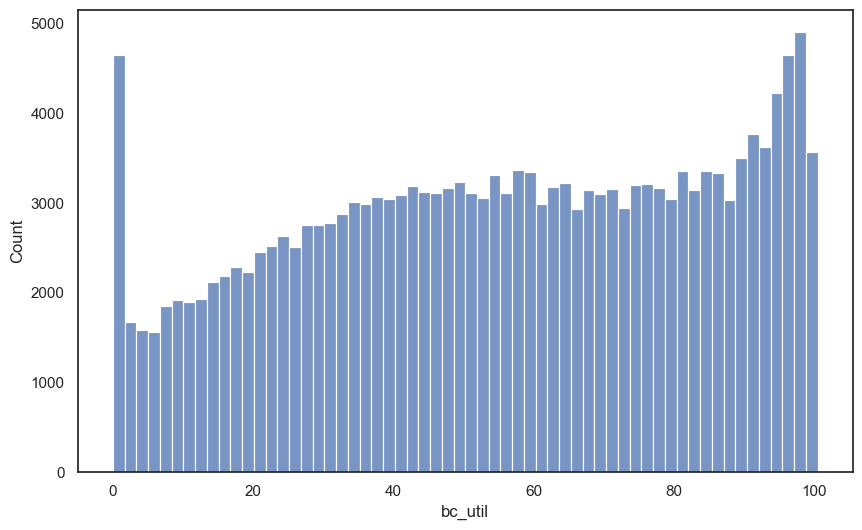

In [21]:
#bc_util
print(df['bc_util'].min())
print(df['bc_util'].max())

upper_bound = df['bc_util'].quantile(0.99)

print(upper_bound)

df = df[(df['bc_util'] < upper_bound)]

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='bc_util')

0
796375
upper_bound : 129933.75


(169177, 16)

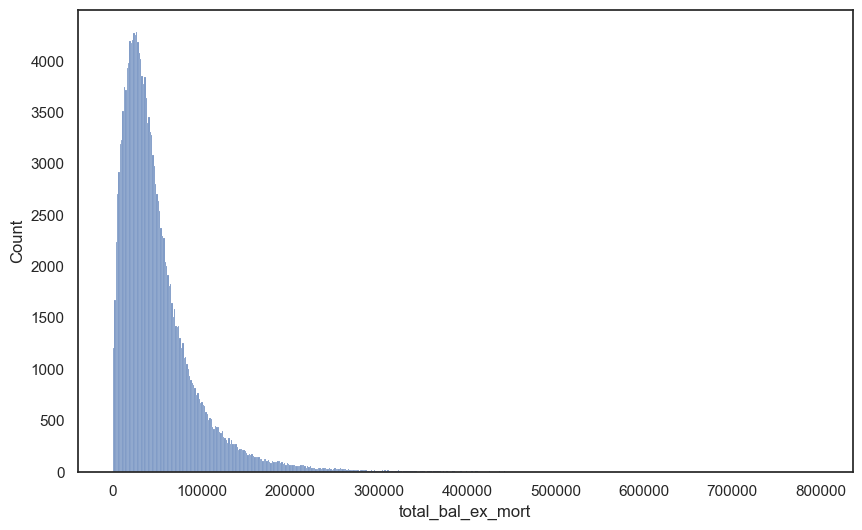

In [22]:
#total_bal_ex_mort
print(df['total_bal_ex_mort'].min())
print(df['total_bal_ex_mort'].max())

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='total_bal_ex_mort')

Q1 = df['total_bal_ex_mort'].quantile(0.25)
Q3 = df['total_bal_ex_mort'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'upper_bound :', upper_bound)
df = df[(df['total_bal_ex_mort'] < upper_bound)]

df.shape
# df['total_bal_ex_mort']>upper_bound

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169177 entries, 0 to 438971
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            169177 non-null  int64  
 1   int_rate               169177 non-null  float64
 2   annual_inc             169177 non-null  float64
 3   dti                    169177 non-null  float64
 4   fico_range_high        169177 non-null  int64  
 5   revol_bal              169177 non-null  int64  
 6   revol_util             169177 non-null  float64
 7   bc_util                169177 non-null  float64
 8   total_bal_ex_mort      169177 non-null  int64  
 9   inq_last_12m           169167 non-null  float64
 10  num_accts_ever_120_pd  169177 non-null  int64  
 11  term                   169177 non-null  object 
 12  home_ownership         169177 non-null  object 
 13  delinq_2yrs            169177 non-null  int64  
 14  mort_acc               169177 non-null  i

<Axes: xlabel='total_bal_ex_mort', ylabel='Count'>

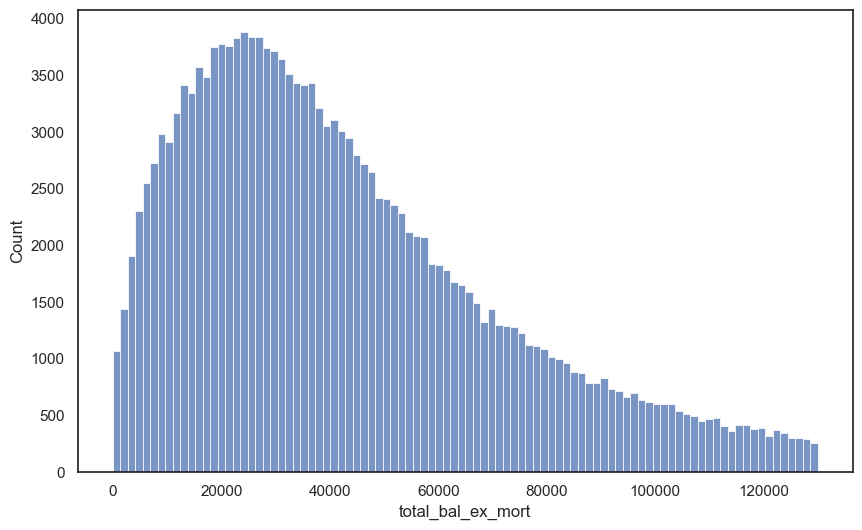

In [24]:
plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='total_bal_ex_mort')

In [25]:
##here categorical data will start

#term
df['term'].value_counts()

df['term'].dtype
df['term'] = df['term'].apply(lambda x: 0 if x=='36 months' else 1)

df['term'].astype('Int32')

df.head()
# 0 and 1
#we have to implement SMOTE in pipeline, we may use smote for target variable too


,funded_amnt,int_rate,annual_inc,dti,fico_range_high,revol_bal,revol_util,bc_util,total_bal_ex_mort,inq_last_12m,num_accts_ever_120_pd,term,home_ownership,delinq_2yrs,mort_acc,loan_status
0,4000,11.99,45000.0,0.67,744,1102,6.9,14.7,1102,5.0,0,1,RENT,0,0,1
5,26000,13.67,82800.0,17.48,664,43091,83.0,88.5,43091,1.0,1,1,MORTGAGE,0,3,1
7,7200,14.46,35000.0,24.34,699,13109,33.5,46.9,37558,0.0,0,1,RENT,0,0,1
10,13800,10.75,95000.0,15.82,709,51278,78.5,80.3,63122,0.0,0,1,MORTGAGE,0,4,1
11,15000,8.39,50000.0,20.04,669,15490,77.1,73.2,31156,3.0,0,1,RENT,0,0,1


In [26]:
#home_ownership

df['home_ownership'] = df['home_ownership'].replace(['RENT', 'MORTGAGE', 'OWN', 'ANY'], [0,1,2,3])
df['home_ownership'].head()

#use 0 1 2 3

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_11180\4227314901.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['home_ownership'] = df['home_ownership'].replace(['RENT', 'MORTGAGE', 'OWN', 'ANY'], [0,1,2,3])


0     0
5     1
7     0
10    1
11    0
Name: home_ownership, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169177 entries, 0 to 438971
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            169177 non-null  int64  
 1   int_rate               169177 non-null  float64
 2   annual_inc             169177 non-null  float64
 3   dti                    169177 non-null  float64
 4   fico_range_high        169177 non-null  int64  
 5   revol_bal              169177 non-null  int64  
 6   revol_util             169177 non-null  float64
 7   bc_util                169177 non-null  float64
 8   total_bal_ex_mort      169177 non-null  int64  
 9   inq_last_12m           169167 non-null  float64
 10  num_accts_ever_120_pd  169177 non-null  int64  
 11  term                   169177 non-null  int64  
 12  home_ownership         169177 non-null  int64  
 13  delinq_2yrs            169177 non-null  int64  
 14  mort_acc               169177 non-null  i

In [28]:
# delinq_2yrs

df['delinq_2yrs'].value_counts().unique
df['delinq_2yrs'].unique()

pd.isna(df['delinq_2yrs']).sum()

Q1 = df['delinq_2yrs'].quantile(0.25)
Q3 = df['delinq_2yrs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = df['delinq_2yrs'].quantile(0.999)

print(df[df['delinq_2yrs'] > upper_bound].value_counts())

print(f'upper_bound :', upper_bound)
df = df[(df['delinq_2yrs'] < upper_bound)]

# plt.figure(figsize=(10, 6))
# sns.set(style = "white")
# sns.histplot(data=df, x='delinq_2yrs')

df.shape

funded_amnt  int_rate  annual_inc  dti    fico_range_high  revol_bal  revol_util  bc_util  total_bal_ex_mort  inq_last_12m  num_accts_ever_120_pd  term  home_ownership  delinq_2yrs  mort_acc  loan_status
1000         11.49     111000.0    3.82   669              3654       25.2        25.9     65686              4.0           11                     1     2               11           0         1              1
             13.59     80000.0     20.09  684              6901       78.4        84.5     75332              2.0           9                      1     1               11           5         0              1
1200         13.59     55000.0     21.27  664              7444       49.6        54.1     14711              0.0           1                      1     1               13           1         1              1
             14.99     35000.0     24.52  664              3994       40.3        33.5     24464              3.0           11                     1     0               

(168957, 16)

In [29]:
df['delinq_2yrs'].unique()

array([0, 1, 2, 6, 5, 8, 3, 4, 7])

In [30]:
# inq_last_12m Numeric feature

import numpy as np
df['inq_last_12m'].unique()

df.replace(np.nan, 0, inplace=True)

df['inq_last_12m'] = df['inq_last_12m'].astype('int64')
df['inq_last_12m'].unique()


array([ 5,  1,  0,  3,  2,  4, 12,  6,  7, 15, 10,  8, 11, 16, 18, 20,  9,
       34, 13, 14, 17, 23, 21, 32, 19, 25, 22, 27, 30, 24, 31, 29, 28, 26,
       41, 37])

<Axes: xlabel='inq_last_12m', ylabel='Count'>

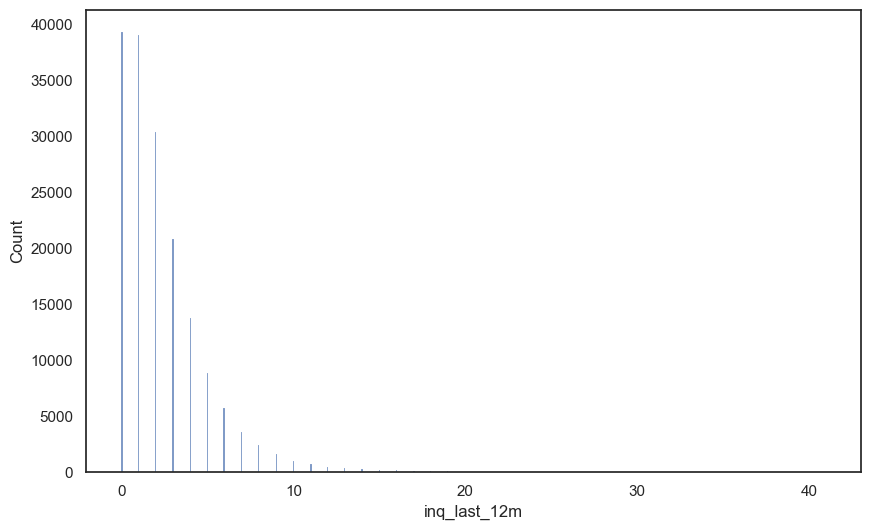

In [31]:
plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='inq_last_12m')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168957 entries, 0 to 438971
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            168957 non-null  int64  
 1   int_rate               168957 non-null  float64
 2   annual_inc             168957 non-null  float64
 3   dti                    168957 non-null  float64
 4   fico_range_high        168957 non-null  int64  
 5   revol_bal              168957 non-null  int64  
 6   revol_util             168957 non-null  float64
 7   bc_util                168957 non-null  float64
 8   total_bal_ex_mort      168957 non-null  int64  
 9   inq_last_12m           168957 non-null  int64  
 10  num_accts_ever_120_pd  168957 non-null  int64  
 11  term                   168957 non-null  int64  
 12  home_ownership         168957 non-null  int64  
 13  delinq_2yrs            168957 non-null  int64  
 14  mort_acc               168957 non-null  i

5.0


(156661, 16)

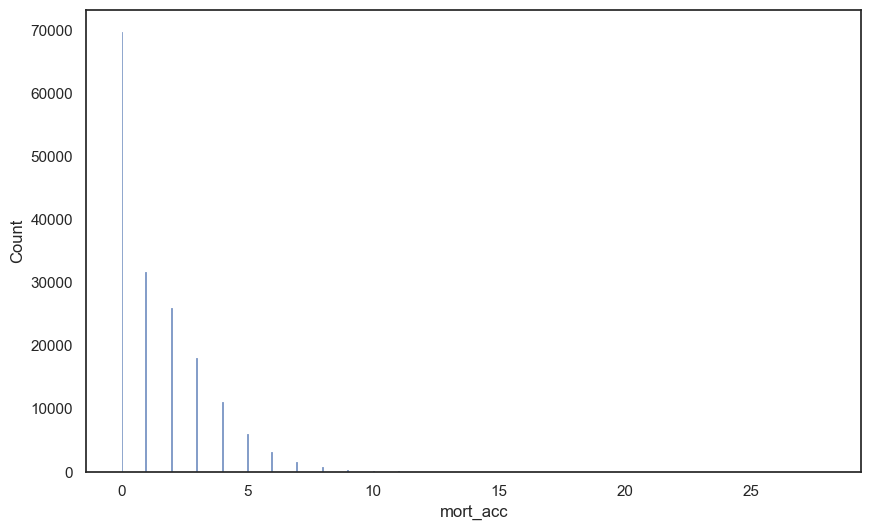

In [33]:
# mort_acc


df['mort_acc'].unique()

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='mort_acc')

Q1 = df['mort_acc'].quantile(0.25)
Q3 = df['mort_acc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['mort_acc'] < upper_bound)]
print(upper_bound)
df.shape


<Axes: xlabel='mort_acc', ylabel='Count'>

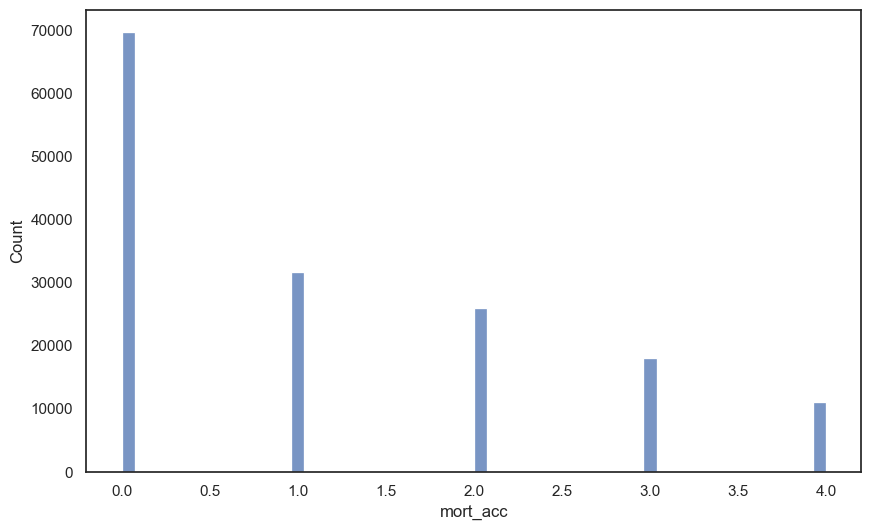

In [34]:
plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='mort_acc')

[ 0  1  3  2  4  6  5  7  8 12  9 10 14 15 11 13 17 16 18 24 22 20 21 26
 19 25 23 31 30 29 28]
7.0


(155052, 16)

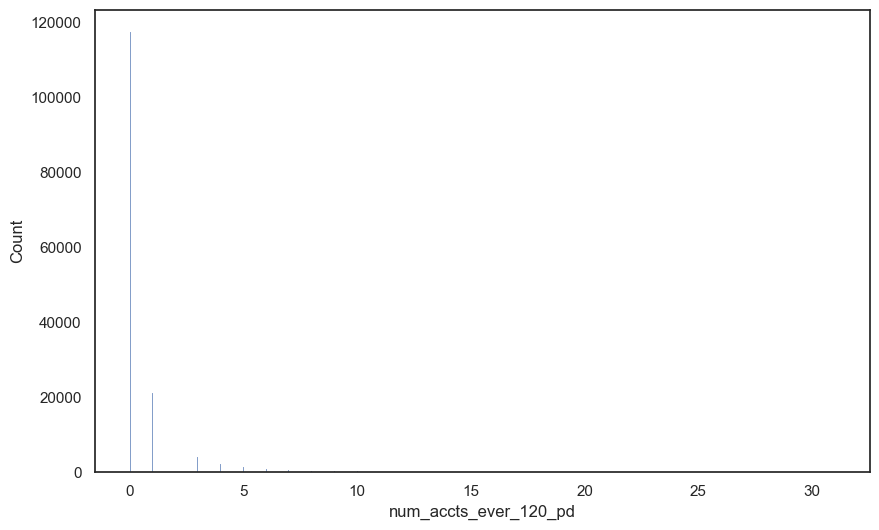

In [35]:
#num_accts_ever_120_pd

print(df['num_accts_ever_120_pd'].unique())

plt.figure(figsize=(10, 6))
sns.set(style = "white")
sns.histplot(data=df, x='num_accts_ever_120_pd')

Q1 = df['num_accts_ever_120_pd'].quantile(0.25)
Q3 = df['num_accts_ever_120_pd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = df['num_accts_ever_120_pd'].quantile(0.99)

print(df['num_accts_ever_120_pd'].quantile(0.99))
df = df[(df['num_accts_ever_120_pd'] < upper_bound)]

df.shape


In [36]:
df.head()

,funded_amnt,int_rate,annual_inc,dti,fico_range_high,revol_bal,revol_util,bc_util,total_bal_ex_mort,inq_last_12m,num_accts_ever_120_pd,term,home_ownership,delinq_2yrs,mort_acc,loan_status
0,4000,11.99,45000.0,0.67,744,1102,6.9,14.7,1102,5,0,1,0,0,0,1
5,26000,13.67,82800.0,17.48,664,43091,83.0,88.5,43091,1,1,1,1,0,3,1
7,7200,14.46,35000.0,24.34,699,13109,33.5,46.9,37558,0,0,1,0,0,0,1
10,13800,10.75,95000.0,15.82,709,51278,78.5,80.3,63122,0,0,1,1,0,4,1
11,15000,8.39,50000.0,20.04,669,15490,77.1,73.2,31156,3,0,1,0,0,0,1


In [37]:
##Here I will add code for getting sample rows from current loans
## then I willl assign 0 and 1 to loan status for randomness in our model

In [38]:
df.head()

,funded_amnt,int_rate,annual_inc,dti,fico_range_high,revol_bal,revol_util,bc_util,total_bal_ex_mort,inq_last_12m,num_accts_ever_120_pd,term,home_ownership,delinq_2yrs,mort_acc,loan_status
0,4000,11.99,45000.0,0.67,744,1102,6.9,14.7,1102,5,0,1,0,0,0,1
5,26000,13.67,82800.0,17.48,664,43091,83.0,88.5,43091,1,1,1,1,0,3,1
7,7200,14.46,35000.0,24.34,699,13109,33.5,46.9,37558,0,0,1,0,0,0,1
10,13800,10.75,95000.0,15.82,709,51278,78.5,80.3,63122,0,0,1,1,0,4,1
11,15000,8.39,50000.0,20.04,669,15490,77.1,73.2,31156,3,0,1,0,0,0,1


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [40]:

def get_data_transformer_object():
    num_pipeline = Pipeline(
        steps=[
            ("scaler", StandardScaler())
        ]
    )
    
    cat_pipeline = Pipeline(
        steps=[
            ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore")),
            ("scaler", StandardScaler(with_mean=False))
        ]
    )
    preprocessor = ColumnTransformer(
        [
            ("num_pipeline", num_pipeline, numerical_features),
            ("cat_pipeline", cat_pipeline, categorical_features)
        ]
    )

    return preprocessor


In [41]:
#before we start transformation, we will create train, test split

from sklearn.model_selection import train_test_split

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

print(X.head(2))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)


# since target variable is imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
)
X_train_resampled, target_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, target_resampled.shape)
print(target_resampled.value_counts())


preprocessing_object=get_data_transformer_object()
input_feature_train_arr=preprocessing_object.fit_transform(X_train_resampled)
input_feature_test_arr=preprocessing_object.transform(X_test)

import pickle
with open("../artifacts/preprocessing_object.pickle", "wb") as file:
            pickle.dump(preprocessing_object, file)

# print(input_feature_train_arr)


   funded_amnt  int_rate  annual_inc    dti  fico_range_high  revol_bal  \
0         4000     11.99     45000.0   0.67              744       1102   
5        26000     13.67     82800.0  17.48              664      43091   

   revol_util  bc_util  total_bal_ex_mort  inq_last_12m  \
0         6.9     14.7               1102             5   
5        83.0     88.5              43091             1   

   num_accts_ever_120_pd  term  home_ownership  delinq_2yrs  mort_acc  
0                      0     1               0            0         0  
5                      1     1               1            0         3  
(124041, 15) (31011, 15)
(173424, 15) (173424,)
loan_status
0    86712
1    86712
Name: count, dtype: int64


In [42]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

#trainig started

def objective(trial):
    # Number of trees in random forest
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['log2', 'sqrt']) 

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(random_state=42, **params)
    
    cv_score = cross_val_score(model, input_feature_train_arr, target_resampled, n_jobs=4, cv=5)
    mean_cv_accuracy = cv_score.mean()
    return mean_cv_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Train a new model using the best parameters
best_model = RandomForestClassifier(random_state=42, **study.best_params)
best_model.fit(input_feature_train_arr, target_resampled)

y_pred = best_model.predict(input_feature_test_arr)

test_acc = accuracy_score(y_test, y_pred)

test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
    y_test, 
    y_pred, 
    average='binary'
)

print("test_accuracy:", test_acc)
print("test_precision:", test_precision)
print("test_recall:", test_recall)
print("test_f1_score:", test_f1)

[I 2025-03-06 13:23:58,509] A new study created in memory with name: no-name-ea0f553a-f327-4c75-9ee5-b5f6228b74b0
[I 2025-03-06 13:45:24,507] Trial 2 finished with value: 0.7238333446909129 and parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7309084960851762.
[I 2025-03-06 13:50:28,543] Trial 3 finished with value: 0.6860068444393033 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7309084960851762.
[I 2025-03-06 14:02:03,682] Trial 4 finished with value: 0.7277082350143499 and parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 90, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7309084960851762.


test_accuracy: 0.6655380348908452
test_precision: 0.7675243160366059
test_recall: 0.7437206926969683
test_f1_score: 0.7554350389059185


In [43]:
# study.best_params

In [44]:
# y_pred

In [45]:
# predictions_proba = best_model.predict_proba(input_feature_test_arr)

In [46]:
# for item in predictions_proba[:5]:
#     print(item)
#     print(item.max())

In [47]:
# predictions_proba.mean()